## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> تست فرض 3 </div>

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> خواندن دیتا </div>

In [4]:
df_test2 = pd.read_csv('df_test2.csv')
df_test2.head()

,Address,value,ur
0,20011395420,1000000,R
1,20011395420,20000,R
2,20011395420,350000,R
3,20011395420,200000,R
4,20001385412,1500000,R


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> بررسی دیتا</div>

In [24]:
df_test2.describe()

,Address,value
count,6.189580e+05,6.189580e+05
mean,1.596606e+10,3.013850e+06
std,5.010112e+09,8.609204e+06
min,1.000100e+10,2.000000e+03
25%,1.140217e+10,2.100000e+05
50%,1.271134e+10,4.000000e+05
75%,2.111553e+10,1.800000e+06
max,2.300671e+10,8.000000e+08


In [25]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618958 entries, 0 to 618957
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Address  618958 non-null  int64 
 1   value    618958 non-null  int64 
 2   ur       618958 non-null  object
dtypes: int64(2), object(1)
memory usage: 14.2+ MB


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> جدا سازی افراد شهری و روستایی</div>

In [7]:
house_R = df_test2[df_test2['ur'] == 'R']
house_U = df_test2[df_test2['ur'] == 'U']

In [8]:
house_R.head()

,Address,value,ur
0,20011395420,1000000,R
1,20011395420,20000,R
2,20011395420,350000,R
3,20011395420,200000,R
4,20001385412,1500000,R


In [9]:
house_U.head()

,Address,value,ur
275960,10004004223,8000000,U
275961,10004004223,200000,U
275962,10004004223,100000,U
275963,10004004223,400000,U
275964,10004004223,200000,U


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> رسم نمودار مقایسه توزیع درآمد بین افراد شهری و روستایی</div>


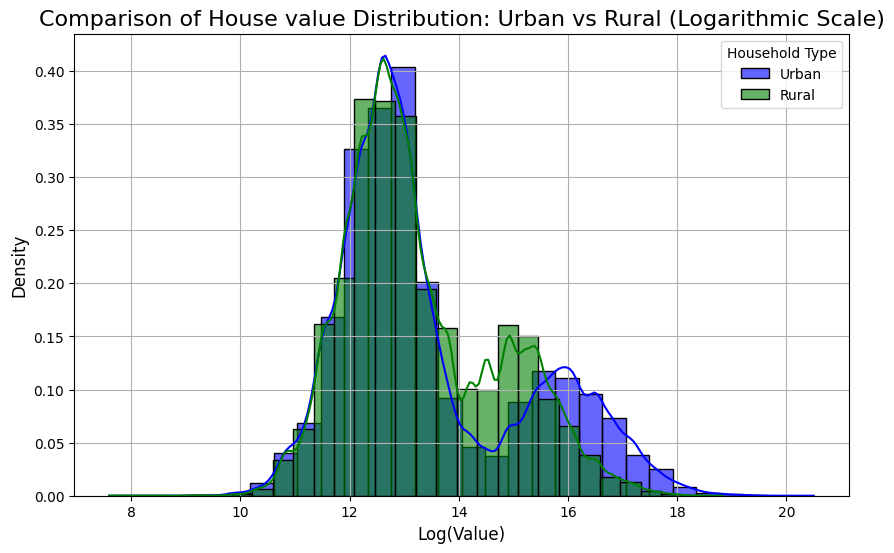

In [14]:
plt.figure(figsize=(10,6))
urban_income_log = np.log1p(house_U['value'])
rural_income_log = np.log1p(house_R['value'])
sns.histplot(urban_income_log, color='blue', kde=True, label='Urban', stat='density', bins=30, alpha=0.6)
sns.histplot(rural_income_log, color='green', kde=True, label='Rural', stat='density', bins=30, alpha=0.6)
plt.title('Comparison of House value Distribution: Urban vs Rural (Logarithmic Scale)', fontsize=16)
plt.xlabel('Log(Value)', fontsize=12)
plt.ylabel('Density', fontsize=12) 
plt.legend(title="Household Type") 
plt.grid(True)
plt.show()

C:\Users\OMO\AppData\Local\Temp\ipykernel_20472\2929503982.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ur', y='value', data=df_test2, palette='Set3')


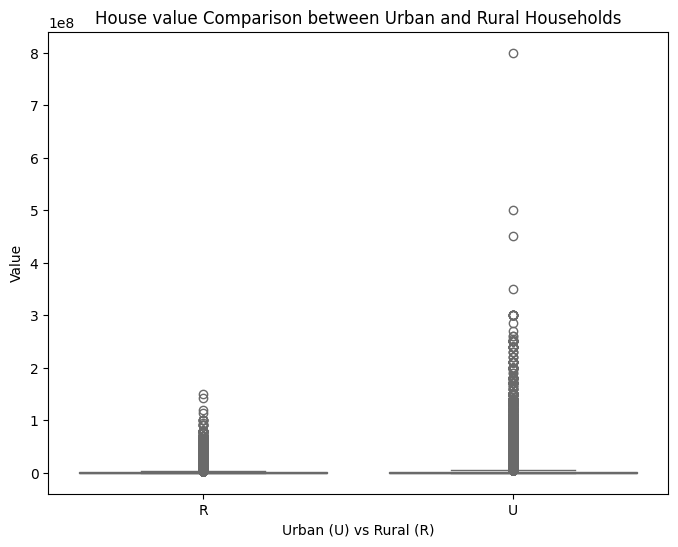

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x='ur', y='value', data=df_test2, palette='Set3')
plt.title('House value Comparison between Urban and Rural Households')
plt.xlabel('Urban (U) vs Rural (R)')
plt.ylabel('Value')
plt.show()

In [22]:
from scipy.stats import mannwhitneyu 

batch_1 = house_R['value']
batch_2 = house_U['value']

# perform mann whitney test 
stat, p_value = mannwhitneyu(batch_1, batch_2) 
print('statistics=%.2f, p=%.2f' % (stat, p_value)) 
# Level of significance 
alpha = 0.05
# conclusion 
if p_value < alpha: 
	print('Reject Null Hypothesis (Significant difference between two samples)') 
else: 
	print('Do not Reject Null Hypothesis (No significant difference between two samples)')


Statistics=46041684151.00, p=0.00
Reject Null Hypothesis (Significant difference between two samples)


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> گزارش آزمون فرض</div>

<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;">
  <h2 style="color: #f1c40f; text-align: center;">گزارش آزمون فرض</h2>
  
  <p style="font-size: 16px; line-height: 1.6;">
    آزمون فرض برای بررسی این سوال انجام شد که آیا به طور میانگین تفاوت مشهودی میان ارزش خانه های شهری و روستایی مشاهده میکنید یا خیر. با توجه به اینکه داده ها توزیع نرمالی نداشتند ، از آزمون فرض U استفاده  کرده ایم. نتایج این آزمون به شرح زیر است :
  </p>
  
  <ul style="font-size: 16px; line-height: 1.8;">
    <li><strong>آمار آزمون (U-statistic):</strong> <span style="color: #e74c3c;">46041684151</span></li>
    <li><strong>p-value مقدار :</strong> <span style="color: #e74c3c;">0</span></li>
  </ul>

  <h3 style="color: #2ecc71;">تحلیل:</h3>
  
  <p style="font-size: 16px; line-height: 1.6;">
    با توجه به مقدار بسیار کم p-value (که بسیار کمتر از سطح معنی‌داری معمول 0.05 است)، می‌توان نتیجه گرفت که فرض بیان شده رد می‌شود. به عبارت دیگر، اختلاف معنی‌داری بین میانگین ارزش خانه های شهری و روستایی وجود دارد.
  </p>

  <p style="font-size: 16px; line-height: 1.6;">
    آمار آزمون (U-statistic) نیز نشان می‌دهد که اختلاف میانگین ارزش خانه های شهری و روستایی بسیار بزرگ است. بنابراین می‌توانیم با اطمینان بالایی نتیجه‌گیری کنیم که ارزش خانه های شهری به طور قابل توجهی بیشتر از ارزش خانه های روستایی است.
  </p>

  <p style="font-size: 16px; line-height: 1.6; color: #27ae60;">
    در نهایت، نتیجه آزمون نشان‌دهنده این است که ارزش خانه های شهری و روستایی برابر نیستند و تفاوت معناداری بین این دو گروه وجود دارد.
  </p>
</div>
